In [114]:
import numpy as np
import pandas as pd
import os
import glob
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.fftpack

import keras.backend as K
import librosa
import librosa.display

import IPython.display as ipd
%matplotlib inline

In [23]:
dataset = pd.DataFrame()

In [24]:
path = './Class1/'

df_class1 = []

for i, filename in enumerate(glob.glob(os.path.join(path, '*.npy'))):
    df_class1.append(np.load(filename))
    dataset.loc[i, 'Class'] = '1' #defining label

In [25]:
path = './Class2/'

df_class2 = []

rows_class1 = dataset.shape[0]

for i, filename in enumerate(glob.glob(os.path.join(path, '*.npy'))):
    df_class2.append(np.load(filename))
    dataset.loc[i + rows_class1, 'Class'] = '2' #defining label

In [26]:
raw = df_class1 + df_class2
print(len(raw))

48


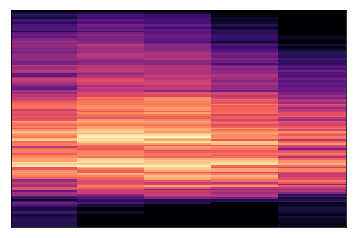

In [28]:
S = librosa.feature.melspectrogram(y=raw[0], sr=44100)
librosa.display.specshow(librosa.power_to_db(S, ref=np.max))

Mel spectogram of each signal


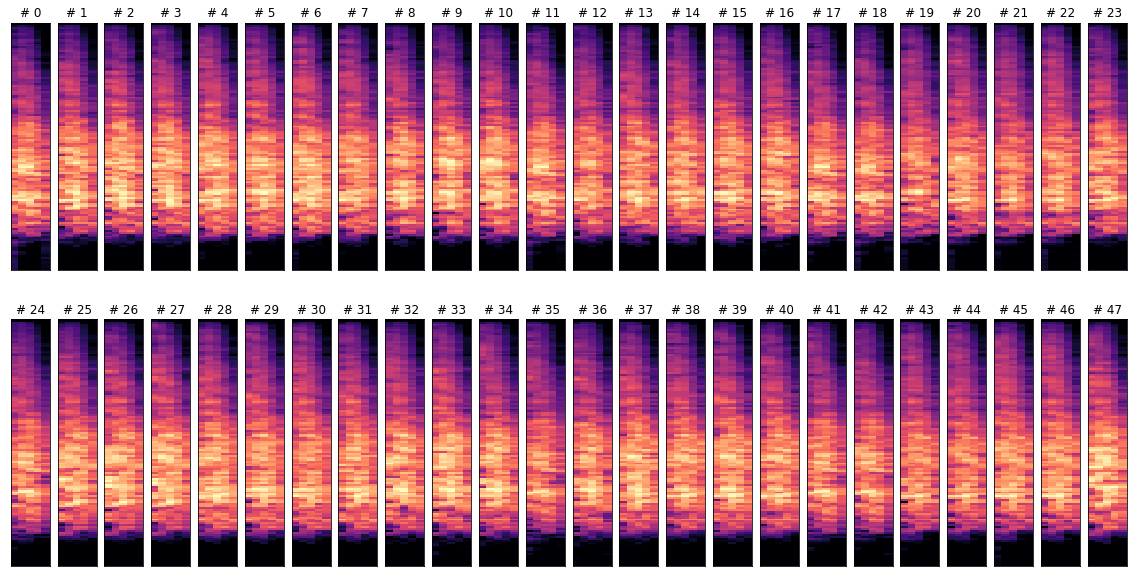

In [58]:
plt.figure(num=None, figsize=(20, 10))
print('Mel spectogram of each signal')

for i, signal in enumerate(raw):
    plt.subplot(len(raw)/24,24,i+1)
    S = librosa.feature.melspectrogram(y=signal, sr=44100)
    librosa.display.specshow(librosa.power_to_db(S, ref=np.max))
    plt.title('# ' + str(i))
    
plt.show()

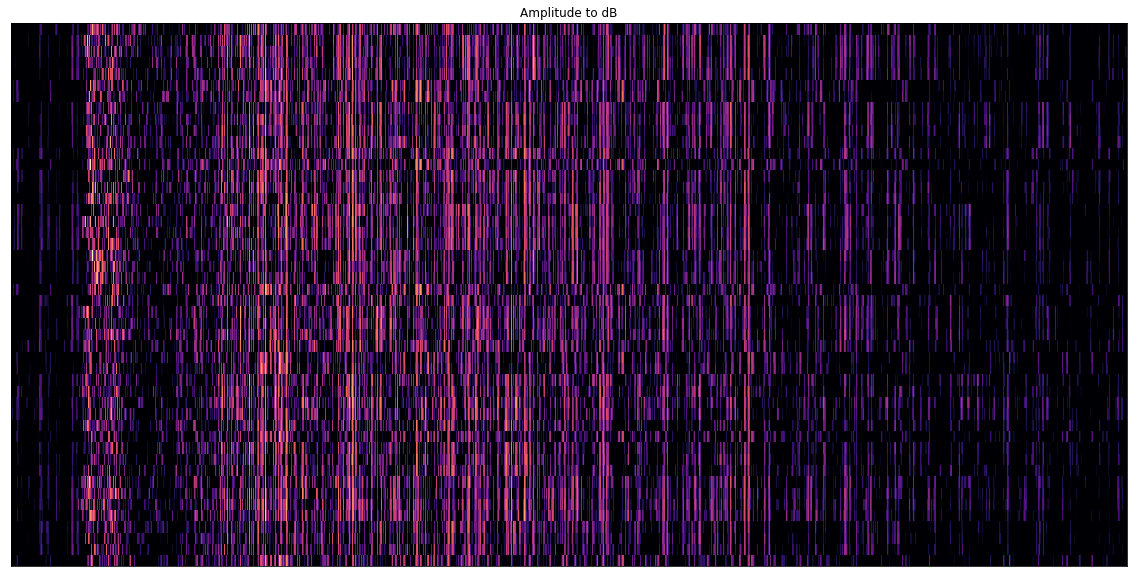

In [78]:
plt.figure(num=None, figsize=(20, 10))
plt.title('Amplitude to dB')

D = librosa.amplitude_to_db(raw)
librosa.display.specshow(D)

## Other approach

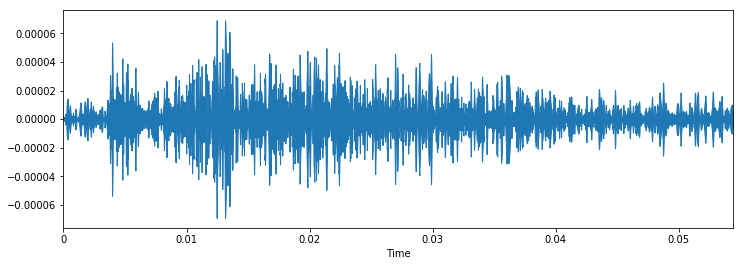

In [119]:
plt.figure(figsize=(12, 4))
librosa.display.waveplot(raw[0], sr=44100)
plt.show()